In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


data = pd.read_csv('Mall_Customers.csv')
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
scaler = StandardScaler()
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19           -1.738999               -0.434801
1           2       1   21           -1.738999                1.195704
2           3       0   20           -1.700830               -1.715913
3           4       0   23           -1.700830                1.040418
4           5       0   31           -1.662660               -0.395980


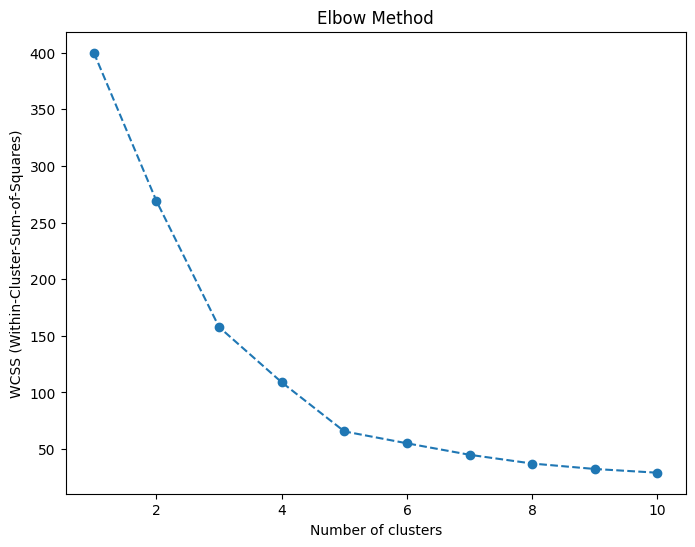

In [3]:
from sklearn.cluster import KMeans


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()


In [4]:

k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])


print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19           -1.738999               -0.434801   
1           2       1   21           -1.738999                1.195704   
2           3       0   20           -1.700830               -1.715913   
3           4       0   23           -1.700830                1.040418   
4           5       0   31           -1.662660               -0.395980   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


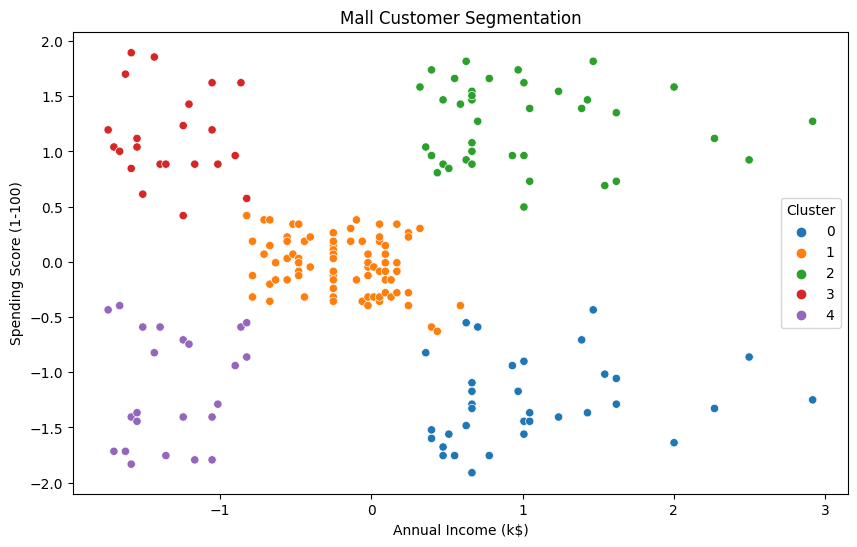

In [5]:
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title('Mall Customer Segmentation')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


X_train, X_test = train_test_split(data[['Annual Income (k$)', 'Spending Score (1-100)']], test_size=0.2, random_state=42)


k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train)


test_cluster_labels = kmeans.predict(X_test)


silhouette_avg = silhouette_score(X_test, test_cluster_labels)
print(f"Silhouette Score on Test Set: {silhouette_avg}")


Silhouette Score on Test Set: 0.566618490320996
